<a href="https://colab.research.google.com/github/wldhks152/2021_codelab/blob/main/07_codelab6_scikitlearn_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏷️ **코랩 환경에서 한글 폰트 사용하기**


---


In [1]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#한글 폰트 추가
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#그래프에서 마이너스 기호가 표시
plt.rcParams['axes.unicode_minus'] = False  

import warnings
warnings.filterwarnings('ignore')

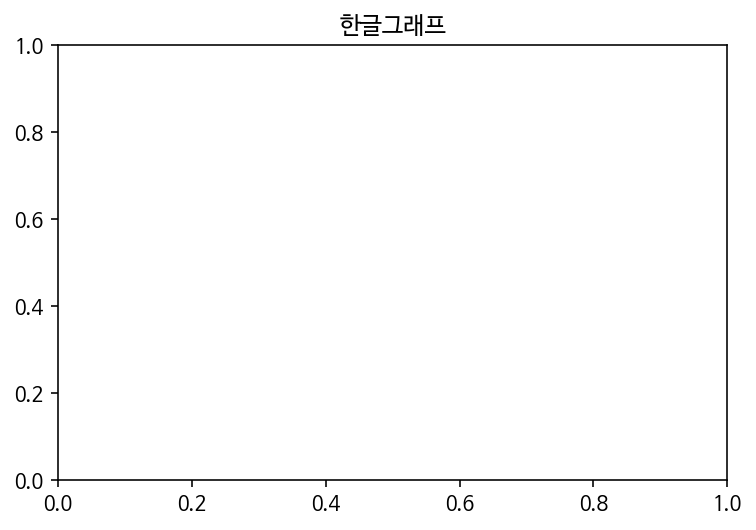

In [3]:
plt.title('한글그래프')
plt.show()

# **사이킷런(Scikit-learn)**
+ https://scikit-learn.org/stable/
+ https://github.com/amueller/odscon-2015
+ 사용하기 쉬운 파아썬 머신러닝 라이브러리
+ 데이터 전처리, 세부조정, 모델 평가, 분류 알고리즘 등을, 간편한 API로 제공
+ 사이킷런을 이용한 머신러닝 과정
  + 1.데이터 불러오기 : 기존데이터 pandas 활용, 샘플데이터 scikit-learn 활용
      + EDA(탐색적 데이터분석) : pandas, matplotlib, seaborn 활용
  + 2.train data와 test data 분리 : scikit-learn 활용
  + 3.모델링 : scikit-learn 활용
  + 4.모델평가 : scikit-learn 활용

&#9997; **사이킷런 주요 모듈**


---
| 모듈 | 설명 |
|------|------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)


---



## **데이터 불러오기**
 

In [4]:
import pandas as pd

In [7]:
dflow = pd.read_csv('/content/drive/MyDrive/등록금eda .csv')
dflow.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.0,6717700.0,6717700.0,5973300.0,7198400.0,NaN,NaN,NaN,off,사립
1,2019,대학교,사립,경기,기존,가천대학교,601000.0,8232500.0,8232500.0,7104500.0,8274800.0,9173100.0,9076000.0,9768000.0,off,사립


In [8]:
dflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    720 non-null    int64  
 1   학교종류    720 non-null    object 
 2   설립구분    720 non-null    object 
 3   지역      720 non-null    object 
 4   상태      720 non-null    object 
 5   학교      720 non-null    object 
 6   입학금     555 non-null    float64
 7   수업료     720 non-null    float64
 8   등록금     720 non-null    float64
 9   인문사회    682 non-null    float64
 10  자연과학    546 non-null    float64
 11  예체능     548 non-null    float64
 12  공학      509 non-null    float64
 13  의학      140 non-null    float64
 14  온라인     720 non-null    object 
 15  사립구분    720 non-null    object 
dtypes: float64(8), int64(1), object(7)
memory usage: 90.1+ KB


In [9]:
import seaborn as sns

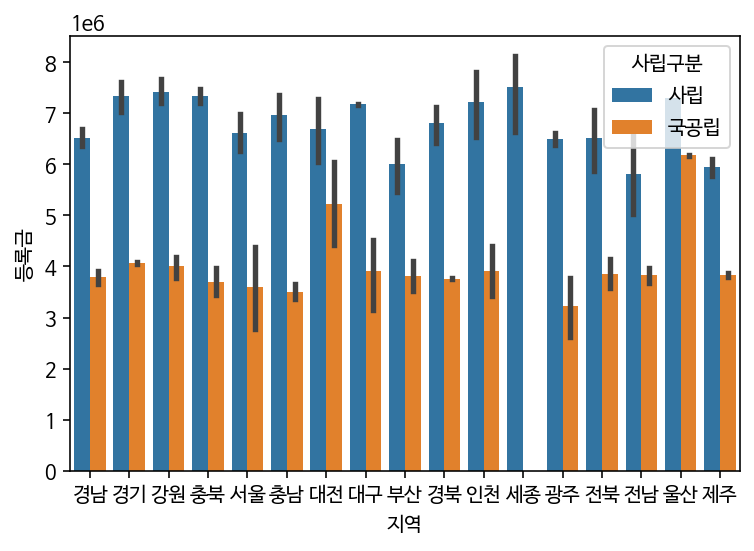

In [12]:
sns.barplot(x = '지역', y ='등록금', hue = '사립구분', data = dflow)
plt.show()

In [13]:
dflow[dflow['지역'] == '울산']

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
156,2019,대학교,특별법법인,울산,기존,울산과학기술원,NaN,6165900.0,6165900.0,5300000.0,6288000.0,NaN,6288000.0,NaN,off,국공립
157,2019,대학교,사립,울산,기존,울산대학교,411000.0,7295500.0,7295500.0,5750000.0,7483400.0,8404600.0,8126600.0,10918000.0,off,사립
397,2020,대학교,특별법법인,울산,기존,울산과학기술원,NaN,6167244.4,6167244.4,5300000.0,6288000.0,NaN,6288000.0,NaN,off,국공립
398,2020,대학교,사립,울산,기존,울산대학교,273000.0,7297051.0,7297051.0,5750000.0,7483991.4,8404633.3,8126721.3,10918000.0,off,사립
636,2021,대학교,특별법법인,울산,기존,울산과학기술원,NaN,6193205.4,6193205.4,5300000.0,6288000.0,NaN,6288000.0,NaN,off,국공립
637,2021,대학교,사립,울산,기존,울산대학교,135000.0,7300443.3,7300443.3,5750000.0,7483991.4,8404633.3,8125751.1,10918000.0,off,사립


In [18]:
dflow.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '입학금', '수업료', '등록금', '인문사회',
       '자연과학', '예체능', '공학', '의학', '온라인', '사립구분'],
      dtype='object')

In [14]:
df = dflow.loc[:,['등록금','인문사회','자연과학','예체능','공학','사립구분']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록금     720 non-null    float64
 1   인문사회    682 non-null    float64
 2   자연과학    546 non-null    float64
 3   예체능     548 non-null    float64
 4   공학      509 non-null    float64
 5   사립구분    720 non-null    object 
dtypes: float64(5), object(1)
memory usage: 33.9+ KB


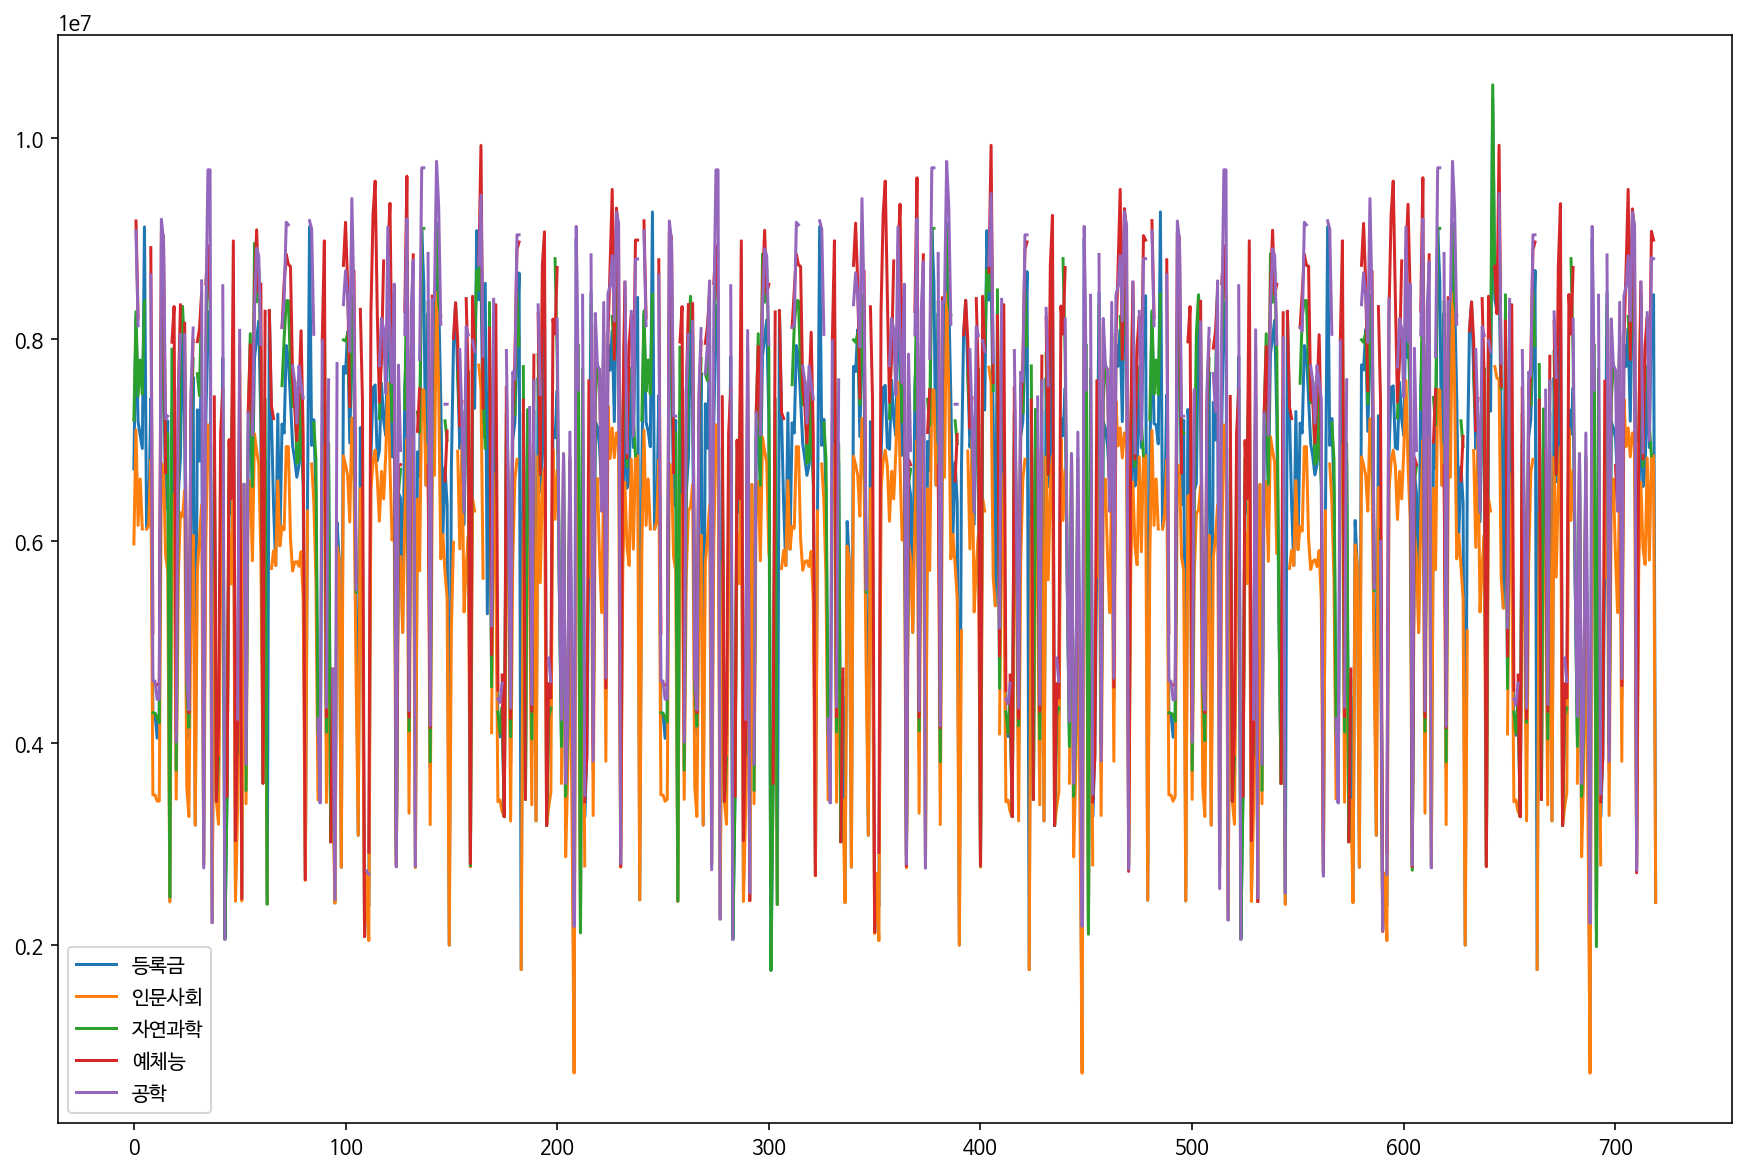

In [17]:
df.plot(figsize=(15, 10))
plt.show()

### **EDA(탐색적 데이터분석)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록금     720 non-null    float64
 1   인문사회    682 non-null    float64
 2   자연과학    546 non-null    float64
 3   예체능     548 non-null    float64
 4   공학      509 non-null    float64
 5   사립구분    720 non-null    object 
dtypes: float64(5), object(1)
memory usage: 33.9+ KB


In [19]:
df.head()

,등록금,인문사회,자연과학,예체능,공학,사립구분
0,6717700.0,5973300.0,7198400.0,NaN,NaN,사립
1,8232500.0,7104500.0,8274800.0,9173100.0,9076000.0,사립
2,7183400.0,6157400.0,7438700.0,8214300.0,8135400.0,사립
3,7054300.0,6618000.0,7796000.0,NaN,NaN,사립
4,6919800.0,6122000.0,7457400.0,8562000.0,8284000.0,사립


#### 결측치 데이터 처리

In [ ]:
import seaborn as sns

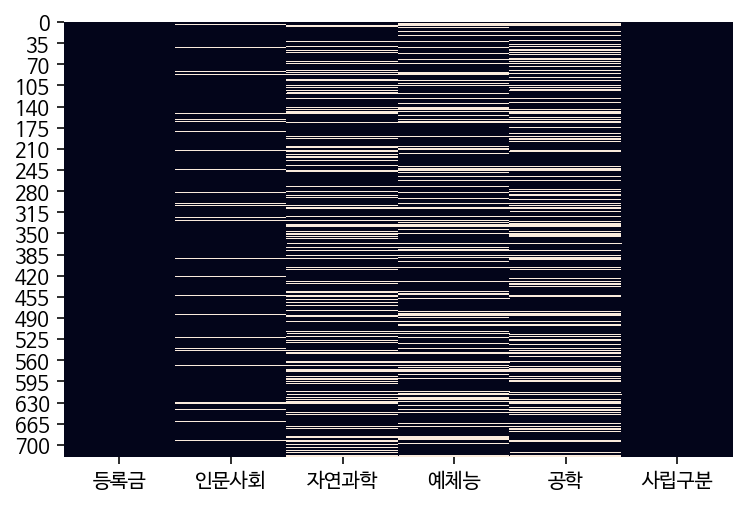

In [22]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [20]:
df.isnull()

,등록금,인문사회,자연과학,예체능,공학,사립구분
0,False,False,False,True,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
715,False,False,False,False,False,False
716,False,False,False,False,False,False
717,False,False,False,False,False,False
718,False,False,True,False,False,False


In [23]:
df = df.dropna()

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 1 to 717
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록금     394 non-null    float64
 1   인문사회    394 non-null    float64
 2   자연과학    394 non-null    float64
 3   예체능     394 non-null    float64
 4   공학      394 non-null    float64
 5   사립구분    394 non-null    object 
dtypes: float64(5), object(1)
memory usage: 21.5+ KB


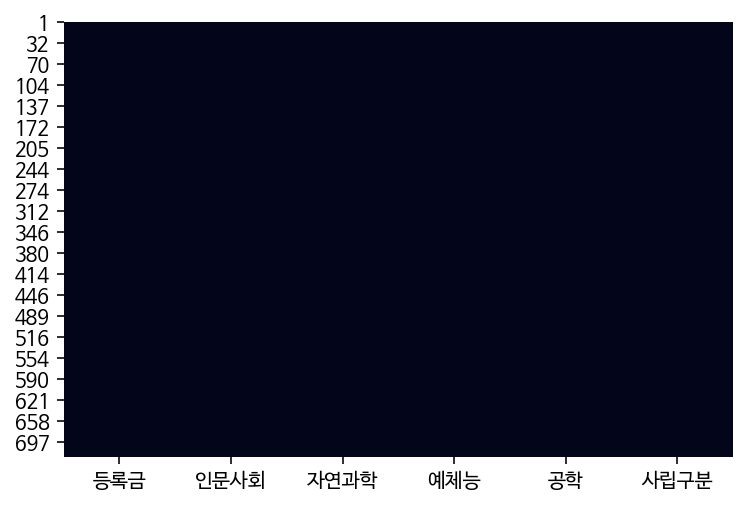

In [25]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

#### 범주형 자료 수치화

In [26]:
df['사립구분']


1       사립
2       사립
4       사립
9      국공립
11     국공립
      ... 
712     사립
713     사립
715     사립
716     사립
717     사립
Name: 사립구분, Length: 394, dtype: object

In [27]:
df['사립구분'] = df['사립구분'].map({'사립' : 1, '국공립' : 0})

In [28]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 1 to 717
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록금     394 non-null    float64
 1   인문사회    394 non-null    float64
 2   자연과학    394 non-null    float64
 3   예체능     394 non-null    float64
 4   공학      394 non-null    float64
 5   사립구분    394 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.5 KB


In [31]:
df['자연과학']

1      8274800.0
2      7438700.0
4      7457400.0
9      4301300.0
11     4253400.0
         ...    
712    8447376.6
713    6744000.0
715    7733012.9
716    7148930.2
717    6848000.0
Name: 자연과학, Length: 394, dtype: float64

In [29]:
df['사립구분']

1      1
2      1
4      1
9      0
11     0
      ..
712    1
713    1
715    1
716    1
717    1
Name: 사립구분, Length: 394, dtype: int64

#### 데이터 분포확인

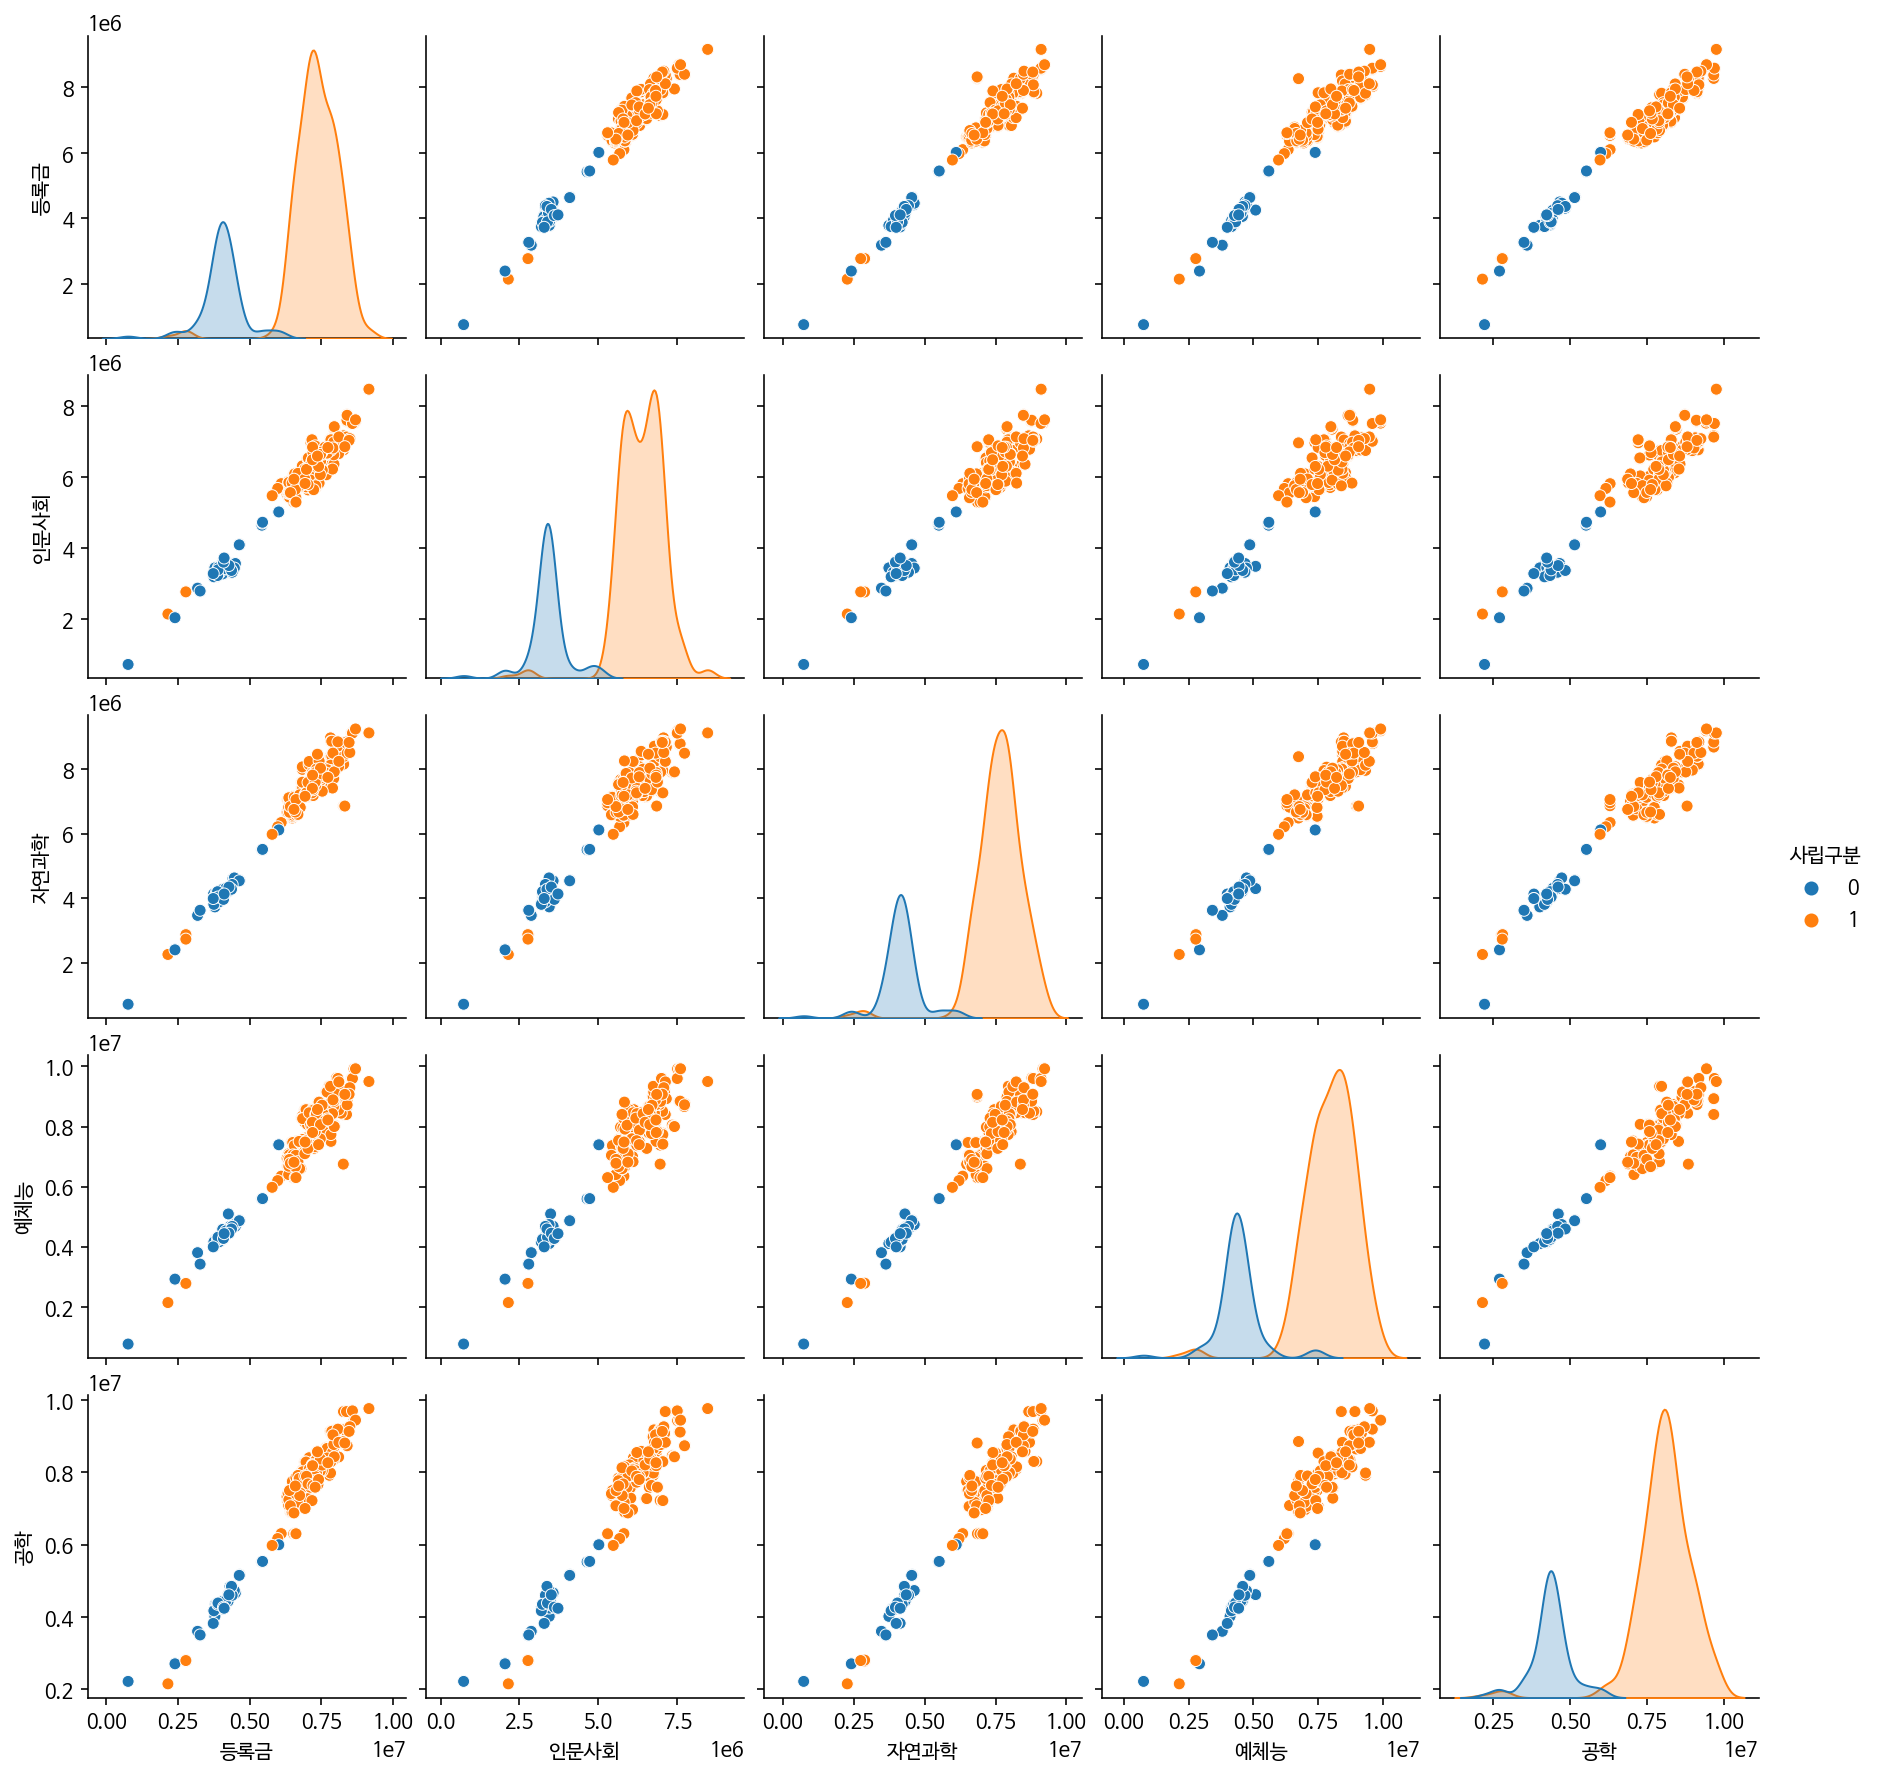

In [30]:
sns.pairplot(data =df, hue ='사립구분')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, '등록금':'인문사회'], df['사립구분'], random_state=0)

## **모델링 및 평가 : scikit-learn 활용**


#### 분류모델
+ 등록금 정보를 이용하여 사립학교인지 아닌지를 분류하시오.

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

1.0

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9797979797979798

In [35]:
dt.predict([[3182800.0,2874000.0]])

array([0])

In [36]:
dt.predict([[7182800.0,5874000.0]])

array([1])

#### 회귀모델
